In [31]:
import math
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
official = pd.read_csv("Official.csv", sep=",", encoding='cp1252')
WithSources = pd.read_csv("WithSources.csv")

In [33]:
label = ["Male", "Female"]
news_percent = [0, 0]
official_percent = [0, 0]

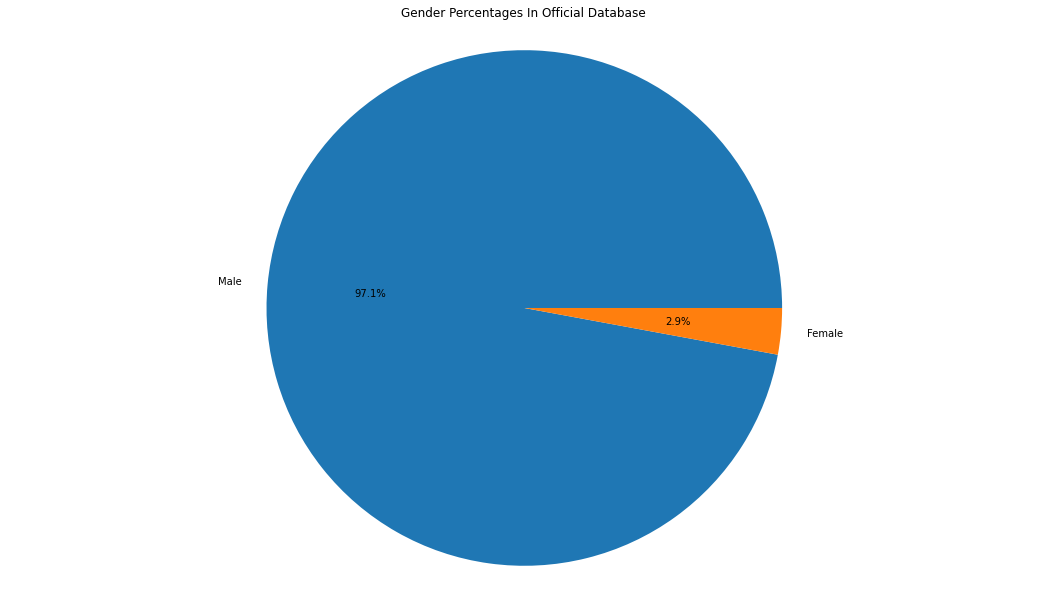

In [34]:
s = 0
for i in range(len(official)):
    gender = official.iloc[i]["Gender"]
    if type(gender) is float or gender == "Unknown":
        continue
        
    if gender == "Male/Female":
        s += 2
        official_percent[0] += 1
        official_percent[1] += 1
        continue
        
    s+=1
    if(gender[0] == 'M'):
        official_percent[0]+=1
    else:
        official_percent[1]+=1
    

    
official_percent[0] /= s
official_percent[1] /= s

plt.pie(official_percent, labels=label, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Gender Percentages In Official Database")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

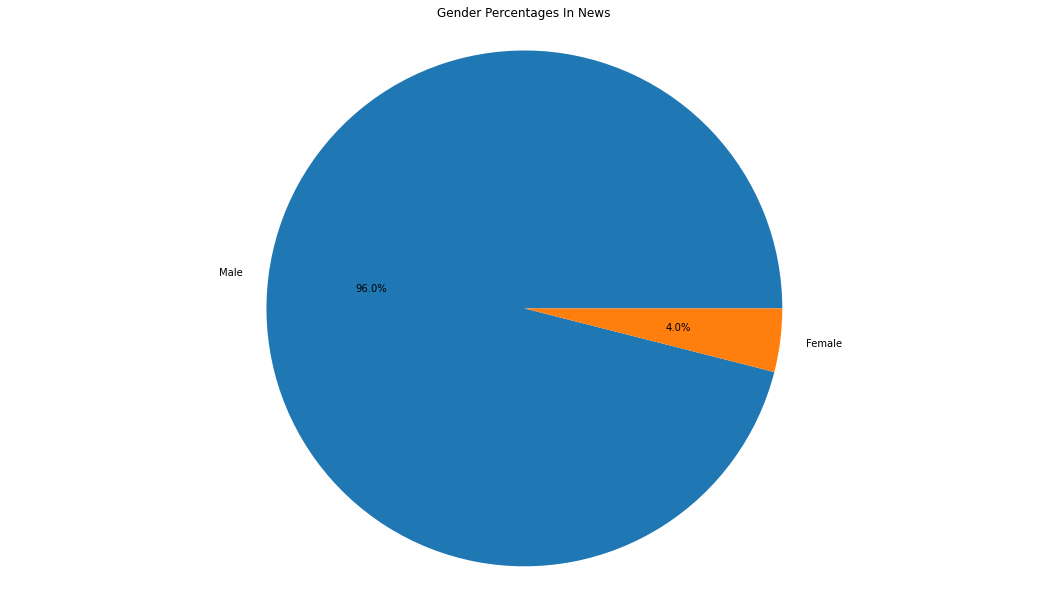

In [35]:
s = 0
for i in range(len(WithSources)):
    gender = WithSources.iloc[i]["gender"]
    if type(gender) is float or gender == "Unknown":
        continue
        
    if gender == "Male & Female":
        s += 2
        news_percent[0] += 1
        news_percent[1] += 1
        continue
        
    s+=1
    if(gender[0] == 'M'):
        news_percent[0]+=1
    else:
        news_percent[1]+=1
    

    
news_percent[0] /= s
news_percent[1] /= s

plt.pie(news_percent, labels=label, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Gender Percentages In News")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [36]:
np = news_percent
op = official_percent

#Let's perform a chi-squared test

#Null Hypothesis: There is no significant statistical difference between observed(shootings 
#as displayed on news) and expected(official shootings) values in regards to gender.

#First, we use the standard d = 0.05 critical value to ensure that we are 95% sure that we are either accepting or rejecting our null hypothesis

#Next, we have 1 degree of Freedom, since we have 2 genders - 1 = 1

#Third, in order to make our results accurate we scale values from both datasets down to the size of the smaller dataset
print("The size of the smaller dataset is: " + str(len(WithSources)))
for i in range(2):
    np[i] *= len(WithSources)
    op[i] *= len(WithSources)

print(np)
print(op)

#Now we perform the chi squared analysis:
X = 0
for i in range(2):
    O = np[i]
    E = op[i]
    #cur is the value for each category
    #cur = (O - E)*(O - E) / E
    cur = abs(O - E) / math.sqrt(E)
    print(O)
    print(E)
    print("Current value: " + str(cur))
    #We find the summation of this, and store it in X
    X += cur

#Looking at the chi squared chart, we have 3.841 as our expected critical value
print("Our expected critical value is 3.841, according to the Chi-Squared Chart")
#Now, let's see if our result, X, exceeds that value
print("X = " + str(X))
#Since X > 3.841, we rejected our null hypothesis
print("Null hypothesis Accepted")
print("There is significant statistical difference between observed(shootings as displayed on news) and expected(official shootings) values.")
print("This means that there is indeed a discrepancy between the shootings by race as displayed by news sources, versus the actual shootings themselves")

The size of the smaller dataset is: 124
[119.07936507936509, 4.92063492063492]
[120.40105540897098, 3.598944591029024]
119.07936507936509
120.40105540897098
Current value: 0.12045215254470334
4.92063492063492
3.598944591029024
Current value: 0.6966940992597043
Our expected critical value is 3.841, according to the Chi-Squared Chart
X = 0.8171462518044076
Null hypothesis Accepted
There is significant statistical difference between observed(shootings as displayed on news) and expected(official shootings) values.
This means that there is indeed a discrepancy between the shootings by race as displayed by news sources, versus the actual shootings themselves


In [41]:
SRME = 0
for i in range(len(label)):
    SRME += (np[i] - op[i])*(np[i] - op[i])

SRME /= len(label)
SRME = math.sqrt(SRME)
print(SRME)

1.321690329605891
